In [0]:
# lets import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [0]:
#read data 
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [0]:
df.shape

(99999, 226)

In [0]:
df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

# Data cleanining

In [0]:
#Checking NAN values
round(100*(df.isnull().sum()/len(df.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

# Imputing values with zero

In [0]:
#In the recharge variables where minumum value is 1, we can impute missing values with zeroes 
#since it means customer didn't recharge their numbere in that particular month
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [0]:
##To find whether data is really misssing???
df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(15)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN



IT shows date and recharge data misssing toghether. It shows person didnt recharge or month 6th

In [0]:
#Take our main focus variables and make list
impute_data=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
             'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
            'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
            'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
             'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
             'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [0]:
df[impute_data]=df[impute_data].apply(lambda x:x.fillna(0))

In [0]:
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [0]:
df['fb_user_6'].value_counts()

0.0    76999
1.0    23000
Name: fb_user_6, dtype: int64

In [0]:
dates = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']


In [0]:
#dropping the date columns
df = df.drop(dates, axis=1)

In [0]:
#%Nan in each column
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number         0.00
circle_id             0.00
loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
loc_og_t2m_mou_9      7.75
loc_og_t2f_mou_6      3.94
loc_og_t2f_mou_7      3.86
loc_og_t2f_mou_8      5.38
loc_og_t2f_mou_9      7.75
l

In [0]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30

In [0]:
df_col= df.columns
df_col

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

##### If there is missing value in a column which show usage of data or call of a customer, we can input the value as 0 inplace of missing value because the particular service was not used in the particular month

In [0]:
df.nunique().sort_values()

std_ic_t2o_mou_6          1
std_ic_t2o_mou_9          1
std_og_t2c_mou_9          1
std_og_t2c_mou_8          1
std_og_t2c_mou_7          1
std_og_t2c_mou_6          1
std_ic_t2o_mou_7          1
std_ic_t2o_mou_8          1
loc_ic_t2o_mou            1
std_og_t2o_mou            1
loc_og_t2o_mou            1
circle_id                 1
fb_user_8                 2
fb_user_7                 2
fb_user_6                 2
night_pck_user_9          2
night_pck_user_6          2
night_pck_user_7          2
night_pck_user_8          2
fb_user_9                 2
monthly_2g_6              5
monthly_2g_9              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_9             11
monthly_3g_8             12
monthly_3g_6             12
monthly_3g_7             15
sachet_3g_6              25
count_rech_3g_6          25
count_rech_3g_9          27
sachet_3g_7              27
sachet_3g_9              27
count_rech_3g_7          28
sachet_3g_8              29
count_rech_3g_8     

sin

In [0]:
df.isnull().sum()

mobile_number            0
circle_id                0
loc_og_t2o_mou        1018
std_og_t2o_mou        1018
loc_ic_t2o_mou        1018
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6           3937
onnet_mou_7           3859
onnet_mou_8           5378
onnet_mou_9           7745
offnet_mou_6          3937
offnet_mou_7          3859
offnet_mou_8          5378
offnet_mou_9          7745
roam_ic_mou_6         3937
roam_ic_mou_7         3859
roam_ic_mou_8         5378
roam_ic_mou_9         7745
roam_og_mou_6         3937
roam_og_mou_7         3859
roam_og_mou_8         5378
roam_og_mou_9         7745
loc_og_t2t_mou_6      3937
loc_og_t2t_mou_7      3859
loc_og_t2t_mou_8      5378
loc_og_t2t_mou_9      7745
loc_og_t2m_mou_6      3937
loc_og_t2m_mou_7      3859
loc_og_t2m_mou_8      5378
loc_og_t2m_mou_9      7745
loc_og_t2f_mou_6      3937
loc_og_t2f_mou_7      3859
loc_og_t2f_mou_8      5378
loc_og_t2f_mou_9      7745
l

In [0]:
from fancyimpute import IterativeImputer

imp = IterativeImputer()
df_col = df.columns


In [0]:
df_clean = pd.DataFrame(IterativeImputer().fit_transform(df))


In [0]:
df_clean.columns = df_col
df_clean.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-45.845051,-17.112118,0.00,-32.799243,186.479938,174.572291,0.00,172.521268,30.93529,22.027301,0.00,22.164907,13.934981,5.064897,0.00,3.646391,41.323911,27.875627,0.00,35.259943,93.307486,91.38189,0.00,90.395687,3.785386,3.803481,0.00,3.703131,-7.968853,-14.447753,0.00,-10.698731,5.424365,-11.949978,0.00,-21.002913,92.521247,94.059771,0.00,94.817515,87.136891,90.617552,0.00,86.329542,1.198952,1.182239,0.00,1.071839,0.0,0.0,0.0,0.0,120.961429,126.861958,0.00,121.92881,-115.745509,-103.808382,0.0,-98.174189,3.912439,4.975207,0.00,4.407228,0.447648,0.044778,0.0,0.047461,0.00,0.00,0.00,0.00,52.993155,40.897459,0.16,58.586359,107.483583,107.11699,4.13,106.173113,12.074043,12.592649,1.15,12.164235,66.162393,59.283718,5.44,64.685996,23.305774,19.769475,0.00,25.951,20.714534,21.653748,0.00,19.616813,2.162414,2.219738,0.00,2.17

In [0]:
df_clean.to_csv('iterative_imputer.csv')

In [0]:
df_clean = pd.read_csv('iterative_imputer.csv')

In [3]:
df_clean.nunique().sort_values()

fb_user_7                    2
fb_user_6                    2
night_pck_user_6             2
night_pck_user_7             2
night_pck_user_8             2
night_pck_user_9             2
fb_user_9                    2
fb_user_8                    2
monthly_2g_9                 5
monthly_2g_6                 5
monthly_2g_8                 6
monthly_2g_7                 6
monthly_3g_9                11
monthly_3g_8                12
monthly_3g_6                12
monthly_3g_7                15
count_rech_3g_6             25
sachet_3g_6                 25
count_rech_3g_9             27
sachet_3g_9                 27
sachet_3g_7                 27
count_rech_3g_7             28
count_rech_3g_8             29
sachet_3g_8                 29
count_rech_2g_6             31
sachet_2g_6                 32
sachet_2g_9                 32
count_rech_2g_9             32
sachet_2g_8                 34
count_rech_2g_8             34
sachet_2g_7                 35
count_rech_2g_7             36
total_re

# Filter High Value customers

In [0]:
#Calculate Total recharge Data i.e number of recharge multiply by avarage data for that month
df_clean['total_rech_data_amt_6'] = df_clean['av_rech_amt_data_6'] * df_clean['total_rech_data_6']
df_clean['total_rech_data_amt_7'] = df_clean['av_rech_amt_data_7'] * df_clean['total_rech_data_7']
df_clean['total_rech_data_amt_8'] = df_clean['av_rech_amt_data_8'] * df_clean['total_rech_data_8']
df_clean['total_rech_data_amt_9'] = df_clean['av_rech_amt_data_9'] * df_clean['total_rech_data_9']

In [0]:
#Calculate Total amount for recharge i.e Calling amount+Data amount
df_clean['amt_data_6'] = df_clean.total_rech_amt_6 + df_clean.total_rech_data_amt_6
df_clean['amt_data_7'] = df_clean.total_rech_amt_7 + df_clean.total_rech_data_amt_7

In [0]:
##June and July are the actual month of customer before taking action or showing behaviour
##So consider avarage of June and July
df_clean['avg_amt_data_6,7']=(df_clean['amt_data_6']+df_clean['amt_data_7'])/2

In [7]:
##Calculate 70th %tile
df_clean['avg_amt_data_6,7'].quantile(0.7)

478.0

In [8]:
##lets Filter the data
filtered_df= df_clean.loc[df_clean['avg_amt_data_6,7'] > df_clean['avg_amt_data_6,7'].quantile(0.7), :].reset_index(drop=True)
filtered_df.head()
filtered_df.shape

,Unnamed: 0,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,amt_data_6,amt_data_7,"avg_amt_data_6,7"
0,0,7.000843e+09,197.385,214.816,213.803,21.100,132.217088,132.720595,0.00,130.415686,198.592292,197.166136,0.00,190.497849,19.661368,-6.482934,0.00,9.508165,26.597863,36.801179,0.00,5.877091,47.100555,46.472386,0.00,44.585473,93.342655,91.398174,0.00,90.462894,7.72395,8.442868,0.00,7.544238,16.823077,0.254897,0.00,-1.181896,141.928279,139.490527,0.00,137.033476,79.83073,83.301896,0.00,82.345251,87.298622,90.803876,0.00,86.275483,2.340945,2.523302,0.00,2.245880,165.025253,172.039185,0.00,166.794505,0.799005,0.777023,0.00,0.724492,3.916549,4.975692,0.00,4.410414,-308.825157,-315.174913,0.0,-304.765924,0.00,0.00,0.00,0.00,47.92077,47.992676,0.16,46.277772,107.477341,107.117701,4.13,106.159444,29.831195,33.1792,1.15,28.549583,160.311004,159.286201,5.44,157.069367,9.57752,10.010192,0.00,9.436228,20.721075,21.658763,0.00,19.618432,8.083012,8.757796,0.00,7.439316,19.428486,20.661882,0.00,18.503058,0.00,0.00,5.44,0.00,-0.422315,0.020018,0

(29953, 210)

In [9]:
#%Nan in each column
round(100*(filtered_df.isnull().sum()/len(filtered_df.index)), 2)

Unnamed: 0               0.0
mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou_9         0.0
loc_og_t2c_mou

# Deriving Churn

In [0]:
##as given in guideline
##adding the incoming and outgoing calls of 9th month
filtered_df['total_calls_mou_9Month'] = filtered_df.total_ic_mou_9 + filtered_df.total_og_mou_9

In [0]:
##Total data usage 2g+3g in 9th month 
filtered_df['total_internet_mb_9Month'] = filtered_df.vol_2g_mb_9 +filtered_df.vol_3g_mb_9

In [0]:
filtered_df['churn']=filtered_df.apply(lambda row: 1 if (row.total_calls_mou_9Month == 0 and row.total_internet_mb_9Month == 0) else 0, axis=1)


In [0]:
##drop column containg 9th month Data
to_drop_col=[col for col in filtered_df.columns if '_9' in col]

In [14]:
filtered_df.churn.value_counts()/filtered_df.churn.value_counts().sum() *100

0    91.877274
1     8.122726
Name: churn, dtype: float64

In [0]:
## Dropping the 9th Month Columns
filtered_df_cleaned  = filtered_df.drop(to_drop_col,axis=1)

In [16]:
print(filtered_df.shape)
print(len(to_drop_col))
print(filtered_df_cleaned.shape)

(29953, 213)
52
(29953, 161)


In [0]:
##we will make analysis based on 6+7 and 8th month
y= filtered_df_cleaned.churn


### Deriving New Features and EDA

Text(0.5, 0.98, 'Churn Status')

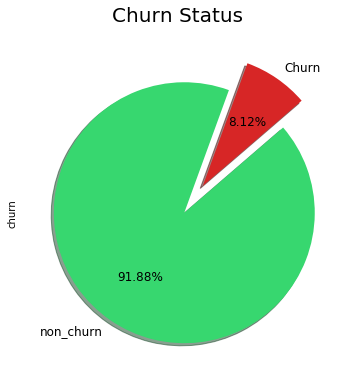

In [18]:
filtered_df['arpu_diff'] =filtered_df.arpu_8 - ((filtered_df.arpu_6 + filtered_df.arpu_7)/2)
filtered_df['total_og_mou_diff'] = filtered_df.total_og_mou_8 - ((filtered_df.total_og_mou_6 + filtered_df.total_og_mou_7)/2)
filtered_df['total_ic_mou_diff'] = filtered_df.total_ic_mou_8 - ((filtered_df.total_ic_mou_6 + filtered_df.total_ic_mou_7)/2)
filtered_df['total_rech_amt_diff'] = filtered_df.total_rech_amt_8 - ((filtered_df.total_rech_amt_6 +filtered_df.total_rech_amt_7)/2)
filtered_df['vol_2g_mb_diff'] = filtered_df.vol_2g_mb_8 - ((filtered_df.vol_2g_mb_6 + filtered_df.vol_2g_mb_7)/2)
filtered_df['max_rech_amt_diff'] = filtered_df.max_rech_amt_8 - ((filtered_df.max_rech_amt_6 + filtered_df.max_rech_amt_7)/2)
filtered_df['vol_3g_mb_diff'] = filtered_df.vol_3g_mb_8 - ((filtered_df.vol_3g_mb_6 + filtered_df.vol_3g_mb_7)/2)
fig = plt.figure(figsize=(8,6))
colors = ["#37d76f", "#D72626"]
labels ="non_churn", "Churn"

plt.suptitle('Churn Status', fontsize=20)

filtered_df['churn'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


In [0]:
## % of Churn is approximately 8%


<Figure size 1080x720 with 0 Axes>

(0, 2000)

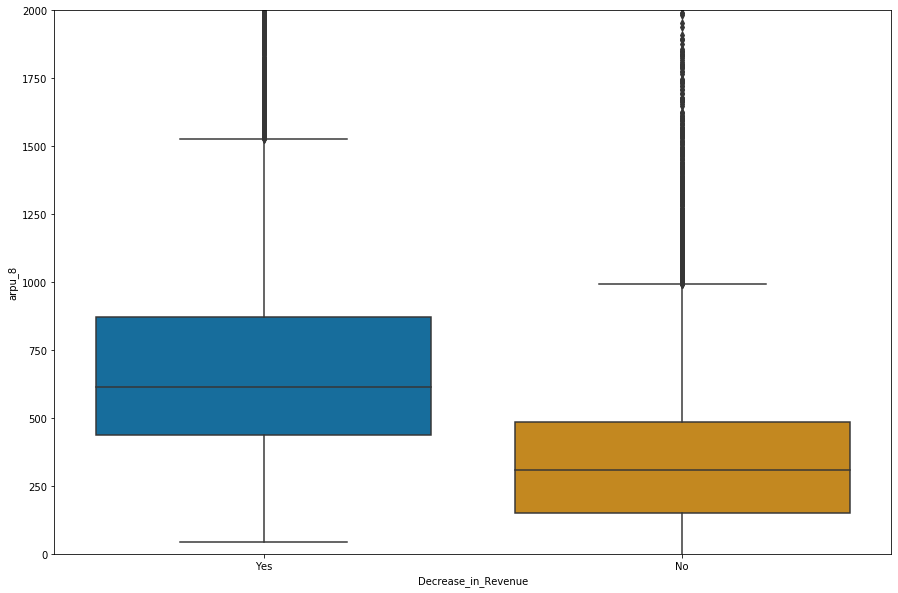

In [19]:
# We will calculate average revenue of 6th and 7th Month
# We will compare average revenue with avearage revenue of 8th month and see how many customer's revenue is dropped
filtered_df_cleaned['Average_Revenue_6_7'] = (filtered_df_cleaned.arpu_6 + filtered_df_cleaned.arpu_7)/2
filtered_df_cleaned['Decrease_in_Revenue']=filtered_df_cleaned.apply(lambda row: 'Yes' if row.Average_Revenue_6_7  < row.arpu_8 else 'No', axis=1)

#sns.countplot(x = filtered_df_cleaned.Decrease_in_Revenue)

plt.figure(figsize=[15,10])
ax = sns.boxplot(x='Decrease_in_Revenue', y='arpu_8', 
                 data=filtered_df_cleaned, 
                 palette="colorblind"
                 )
ax.set_ylim([0, 2000])      # function! your code-sample is wrong here!



### <font color='green'> From the Above Box Plot we can conclude the customer who is getting churned gives the average revenuue around 600 to company, So the customer with higher average revenues are getting churned

In [0]:
filtered_df_cleaned = filtered_df_cleaned.drop(['Decrease_in_Revenue'],axis =1)
#Dropping the revenue of 6th and 7th because we are considering the average of  6th and 7th month
filtered_df_cleaned = filtered_df_cleaned.drop(['arpu_6','arpu_7'],axis =1)


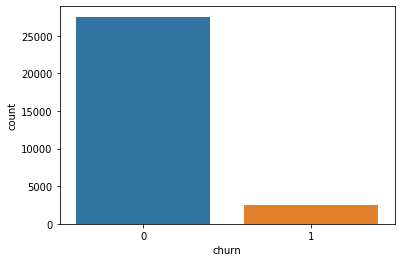

In [21]:
#filtered_df_cleaned.columns
##Number_of_calls_to_other_Network_ in 6th and 7th month average
filtered_df_cleaned['offnet_mou_6_7'] = (filtered_df_cleaned.offnet_mou_6 + filtered_df_cleaned.offnet_mou_7)/2

filtered_df_cleaned['Decrease_In_Offnet_calls']=filtered_df_cleaned.apply(lambda row: 'Yes' if row.offnet_mou_6_7  < row.offnet_mou_8 else 'No', axis=1)

## Checking how many customers got churned who have decrease the number of outgoing calls to other network

lessOffMouDf = filtered_df_cleaned.loc[filtered_df_cleaned['Decrease_In_Offnet_calls'] == 'Yes'] 
sns.countplot(x= filtered_df_cleaned.churn ,data= lessOffMouDf)
filtered_df_cleaned = filtered_df_cleaned.drop(['Decrease_In_Offnet_calls'],axis =1)

### <font color='green'> Very less number of customers are getting churned whose number of outgoing calls has decreased  

In [0]:
## Bifurcating the customer in 2g and 3g network
filtered_df_cleaned['No_of_Recharges_IN_2g'] =filtered_df_cleaned['count_rech_2g_6'] + filtered_df_cleaned['count_rech_2g_7']/2
filtered_df_cleaned['No_of_Recharges_IN_3g'] =filtered_df_cleaned['count_rech_3g_6'] + filtered_df_cleaned['count_rech_3g_7']/2
filtered_df_cleaned['Customer_Network'] = filtered_df_cleaned.apply(lambda row: '3G' if row.No_of_Recharges_IN_3g  > row.No_of_Recharges_IN_2g else '2G', axis=1)

<Figure size 1080x720 with 0 Axes>

(0, 2000)

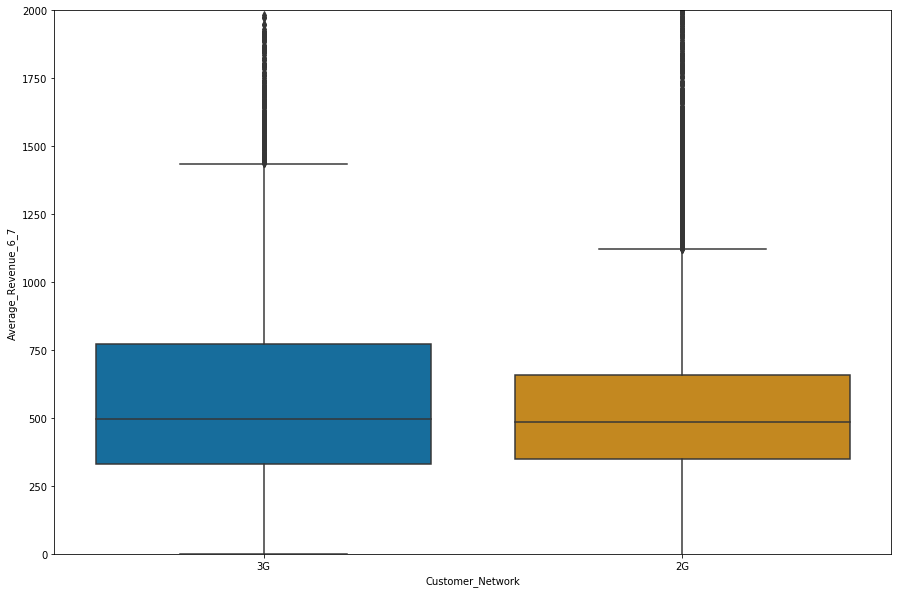

In [23]:
## Revenue of Customers based on 2g and 3g
plt.figure(figsize=[15,10])
ax = sns.boxplot(x='Customer_Network', y='Average_Revenue_6_7', 
                 data=filtered_df_cleaned, 
                 palette="colorblind"
                 )
ax.set_ylim([0, 2000])    



### The average revenueis same from both 2g and 3G Network

Text(0.5, 1.0, '2G_Customers')

Text(0.5, 1.0, '3G_Customers')

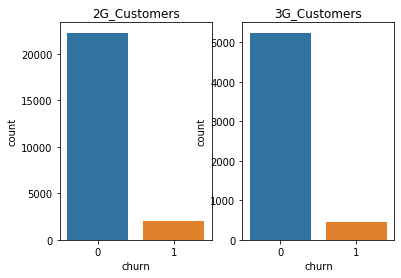

In [24]:
TwoGNetChurnDf = filtered_df_cleaned.loc[filtered_df_cleaned['Customer_Network'] == '2G'] 

ThreeG = filtered_df_cleaned.loc[filtered_df_cleaned['Customer_Network'] == '3G'] 




f, axes = plt.subplots(1, 2)
sns.countplot(x= TwoGNetChurnDf.churn ,data= TwoGNetChurnDf, ax=axes[0]).set_title('2G_Customers')
sns.countplot(x= ThreeG.churn ,data= ThreeG, ax=axes[1]).set_title('3G_Customers')


### The number of Customer getting churned from 2g and 3g Network is same, So Company does not have to see whether the customer is in2g or 3g Network before rolling out any offer  to retain the customer

In [0]:
filtered_df_cleaned = filtered_df_cleaned.drop(['No_of_Recharges_IN_2g','No_of_Recharges_IN_2g','Customer_Network'],axis =1)

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'No of Customers')

Text(0.5, 0, 'days')

Text(0.5, 1.0, 'By_days')

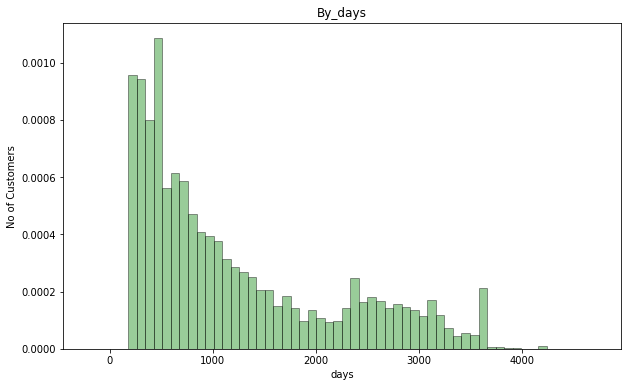

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(filtered_df['aon'], hist=True,  
              color = 'Green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 0})
ax.set_ylabel('No of Customers')
ax.set_xlabel('days')
ax.set_title('By_days')


### Observation

#### As we can see in above graph, the number of customers are very less as the age on network increases. The customer has the tendency to leave the network. So the Company needs to ensure the customer whose age on network more get more attractive offers as loyalty bonus



In [0]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va) 

In [0]:
filtered_df['churn_status']=filtered_df['churn'].apply(lambda x:'Churn' if x==1 else 'Non_churn')


In [29]:
filtered_df['churn_status']

0            Churn
1            Churn
2        Non_churn
3        Non_churn
4        Non_churn
           ...    
29948    Non_churn
29949    Non_churn
29950    Non_churn
29951    Non_churn
29952    Non_churn
Name: churn_status, Length: 29953, dtype: object

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, '% of churn')

Text(0, 0.5, '% of churn')

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, '% of churn')

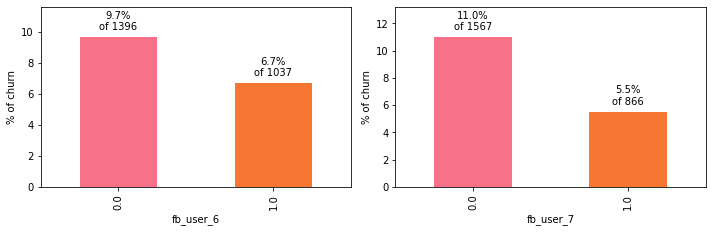

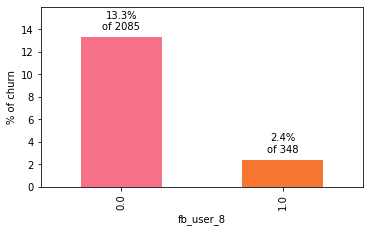

In [30]:
plt.figure(figsize=(10, 6))
color=sns.color_palette('Set2', 16)
grp = filtered_df.groupby(['churn_status','fb_user_6'])['fb_user_6'].count()
cnt = filtered_df.groupby('fb_user_6')['fb_user_6'].count()
percentages = grp.unstack() * 100 / cnt.T
plt.subplot(2,2,1)
ax= percentages.loc['Churn'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of ' + 'churn')
showLabels(ax, grp['Churn'].to_dict())
percentages = grp.unstack() * 100 / cnt.T




color=sns.color_palette('Set2', 16)
grp = filtered_df.groupby(['churn_status','fb_user_7'])['fb_user_7'].count()
cnt = filtered_df.groupby('fb_user_7')['fb_user_7'].count()
percentages = grp.unstack() * 100 / cnt.T
plt.subplot(2,2,2)
ax= percentages.loc['Churn'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of ' + 'churn')
showLabels(ax, grp['Churn'].to_dict())

plt.margins(0.2, 0.2)
plt.tight_layout()
percentages = grp.unstack() * 100 / cnt.T


plt.figure(figsize=(10, 6))
color=sns.color_palette('Set2', 16)
grp = filtered_df.groupby(['churn_status','fb_user_8'])['fb_user_8'].count()
cnt = filtered_df.groupby('fb_user_8')['fb_user_8'].count()
plt.subplot(2,2,3)
percentages = grp.unstack() * 100 / cnt.T
ax= percentages.loc['Churn'].plot.bar(color=sns.color_palette('husl', 16))
ax.set_ylabel('% of ' + 'churn')
showLabels(ax, grp['Churn'].to_dict())

plt.margins(0.2, 0.2)
plt.tight_layout()
percentages = grp.unstack() * 100 / cnt.T


#### The orange bar represent the number of people availing the facebook recharge and pink color represent the people has not availed the facebook recharge. We can see that the people who have not availed the facebook service has more probaility of getting churned. We can also say that the number of people availig the facebook service is also decreasing(June -1037, July - 866 , August -348).
#### <font color="red">The company needs to take some steps to promote their facebook recharge service. If there is any quality issue in fb service company need to take appropraiate action to improve the services </font>



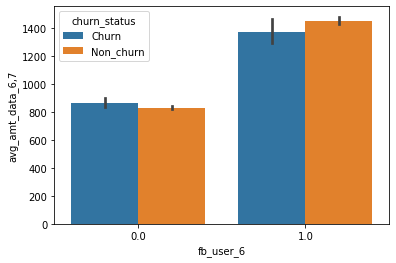

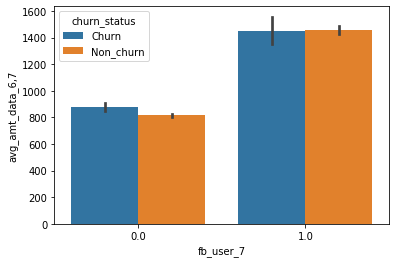

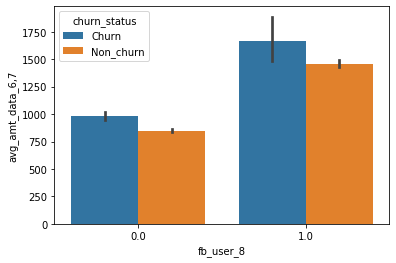

In [31]:

sns.barplot(x='fb_user_6', y='avg_amt_data_6,7', hue="churn_status", data=filtered_df, estimator=np.mean)
plt.show()
sns.barplot(x='fb_user_7', y='avg_amt_data_6,7', hue="churn_status", data=filtered_df, estimator=np.mean)
plt.show()
sns.barplot(x='fb_user_8', y='avg_amt_data_6,7', hue="churn_status", data=filtered_df, estimator=np.mean)
plt.show()


#### <font color="red"> The Customers with higher revenue availing the facebook recharge, has good chance of  getting churned 

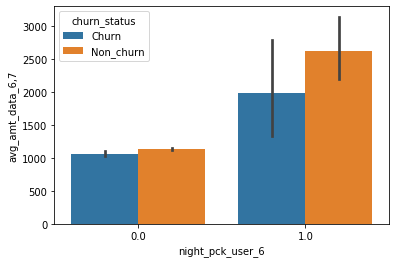

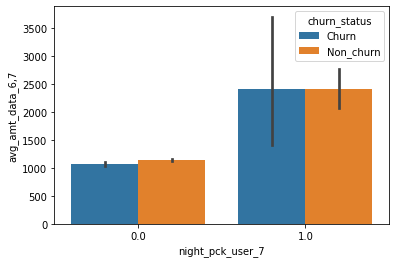

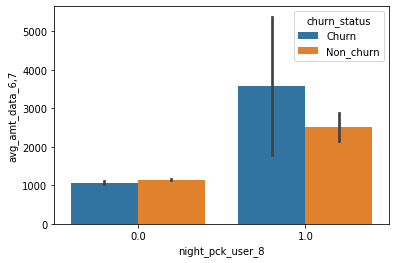

In [32]:
#Analysing the Night pack with Average Revenue and their Churn 
sns.barplot(x='night_pck_user_6', y='avg_amt_data_6,7', hue="churn_status", data=filtered_df, estimator=np.mean)
plt.show()
sns.barplot(x='night_pck_user_7', y='avg_amt_data_6,7', hue="churn_status", data=filtered_df, estimator=np.mean)
plt.show()
sns.barplot(x='night_pck_user_8', y='avg_amt_data_6,7', hue="churn_status", data=filtered_df, estimator=np.mean)
plt.show()


#### <font color="green"> Conclusion 3 : <b> The Customer who avail the Night Pack have more average revenue, But the Problem is the probability of such customer who avail the night service is high as it is evident from above graph. </font> <br>  <font color="red"> The company need to verify what is the exact issue with customers </b>

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Avg_cost')

Text(0.5, 1.0, 'Churn Vs Avg_cost')

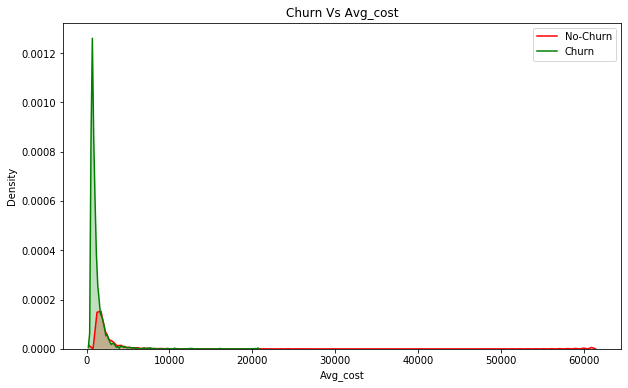

In [33]:
# churn Vs avg amount per data

plt.figure(figsize=(10, 6))

ax = sns.kdeplot(filtered_df['avg_amt_data_6,7'][(filtered_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(filtered_df['avg_amt_data_6,7'][(filtered_df["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Avg_cost')
ax.set_title('Churn Vs Avg_cost')



#### Customer with low Average Revenue in 6th and 7th month have more probability density of churning the services,

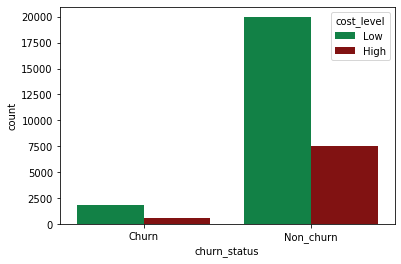

In [34]:
for col in [filtered_df]:
    col.loc[col['avg_amt_data_6,7'] <= 1153.7017151871266, 'cost_level'] = 'Low'
    col.loc[col['avg_amt_data_6,7'] > 1153.7017151871266, 'cost_level'] = 'High'

sns.countplot(x='churn_status', data=filtered_df, 
                   palette=['#009345', '#930000'], hue='cost_level')

### The Customer with higher average revenue have less tendency to churn, but company needs to focus on customer to retain such customers

## Based upon action analysis with probability density

Text(0, 0.5, 'Density')

Text(0.5, 0, 'arpu_diff')

Text(0.5, 1.0, 'Churn Vs arpu_diff')

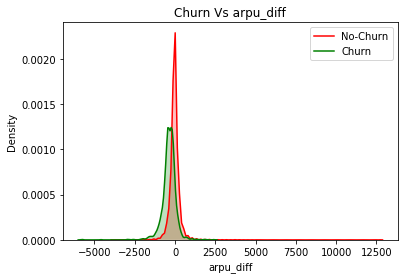

In [35]:
ax = sns.kdeplot(filtered_df['arpu_diff'][(filtered_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(filtered_df['arpu_diff'][(filtered_df["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('arpu_diff')
ax.set_title('Churn Vs arpu_diff')

## <font color="red"> If the revenue in the 8th month is decreased as compared to average revenue of 6th and 7th month, churn probability increases </font>

Text(0, 0.5, 'Density')

Text(0.5, 0, 'total_og_mou_diff')

Text(0.5, 1.0, 'Churn Vs total_og_mou_diff')

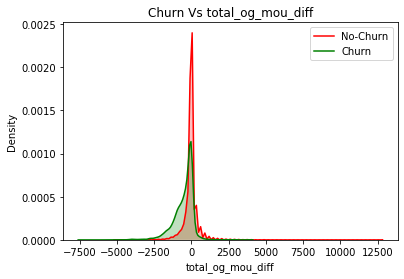

In [36]:
ax = sns.kdeplot(filtered_df['total_og_mou_diff'][(filtered_df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(filtered_df['total_og_mou_diff'][(filtered_df["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('total_og_mou_diff')
ax.set_title('Churn Vs total_og_mou_diff')

### <font color="red"> If the total outgoing minutes in the 8th month is decreased as compared to average revenue of 6th and 7th month, churn probability increases </font>

In [0]:
### Since we have derived new feature by using same feature, we have to drop parent columns
filtered_df=filtered_df.drop(['arpu_8','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_rech_amt_8','total_rech_amt_6','total_rech_amt_7',
                            'vol_2g_mb_8','vol_2g_mb_6','vol_2g_mb_7','max_rech_amt_8','max_rech_amt_6',
                            'max_rech_amt_7','vol_3g_mb_8','vol_3g_mb_6','vol_3g_mb_7','churn_status','Unnamed: 0','mobile_number','cost_level'],axis=1)

In [0]:
#filtered_df_cleaned_cleaned['arpu_diff'] =filtered_df_cleaned.arpu_8 - ((filtered_df_cleaned.arpu_6 + filtered_df_cleaned.arpu_7)/2)
filtered_df_cleaned['total_og_mou_diff'] = filtered_df_cleaned.total_og_mou_8 - ((filtered_df_cleaned.total_og_mou_6 + filtered_df_cleaned.total_og_mou_7)/2)
filtered_df_cleaned['total_ic_mou_diff'] = filtered_df_cleaned.total_ic_mou_8 - ((filtered_df_cleaned.total_ic_mou_6 + filtered_df_cleaned.total_ic_mou_7)/2)
filtered_df_cleaned['total_rech_amt_diff'] = filtered_df_cleaned.total_rech_amt_8 - ((filtered_df_cleaned.total_rech_amt_6 +filtered_df_cleaned.total_rech_amt_7)/2)
filtered_df_cleaned['vol_2g_mb_diff'] = filtered_df_cleaned.vol_2g_mb_8 - ((filtered_df_cleaned.vol_2g_mb_6 + filtered_df_cleaned.vol_2g_mb_7)/2)
filtered_df_cleaned['max_rech_amt_diff'] = filtered_df_cleaned.max_rech_amt_8 - ((filtered_df_cleaned.max_rech_amt_6 + filtered_df_cleaned.max_rech_amt_7)/2)
filtered_df_cleaned['vol_3g_mb_diff'] = filtered_df_cleaned.vol_3g_mb_8 - ((filtered_df_cleaned.vol_3g_mb_6 + filtered_df_cleaned.vol_3g_mb_7)/2)

In [0]:
filtered_df_cleaned=filtered_df_cleaned.drop(['arpu_8','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_rech_amt_8','total_rech_amt_6','total_rech_amt_7',
                            'vol_2g_mb_8','vol_2g_mb_6','vol_2g_mb_7','max_rech_amt_8','max_rech_amt_6',
                            'max_rech_amt_7','vol_3g_mb_8','vol_3g_mb_6','vol_3g_mb_7','Unnamed: 0','mobile_number'],axis=1)

In [40]:
filtered_df.shape

(29953, 202)

In [41]:
filtered_df_cleaned.shape

(29953, 150)

#### Dropping the Outliers
### We will be dropping all the values of above 99 percentile

In [0]:
for (columnName, columnData) in filtered_df_cleaned.iteritems():
    #print(columnName)
    if(columnName != 'churn' ):
        filtered_df_cleaned1 = filtered_df_cleaned[filtered_df_cleaned[columnName] < np.percentile(filtered_df_cleaned[columnName],99)]
        


In [43]:

filtered_df_cleaned1.shape

(29653, 150)

In [44]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
y = filtered_df_cleaned1['churn']
X = filtered_df_cleaned1.drop(['churn'],axis=1)

# Putting response variable to y

filtered_df_cleaned_colsDropped =  filtered_df_cleaned1.drop(['churn'],axis=1)
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

<Figure size 1440x1440 with 0 Axes>

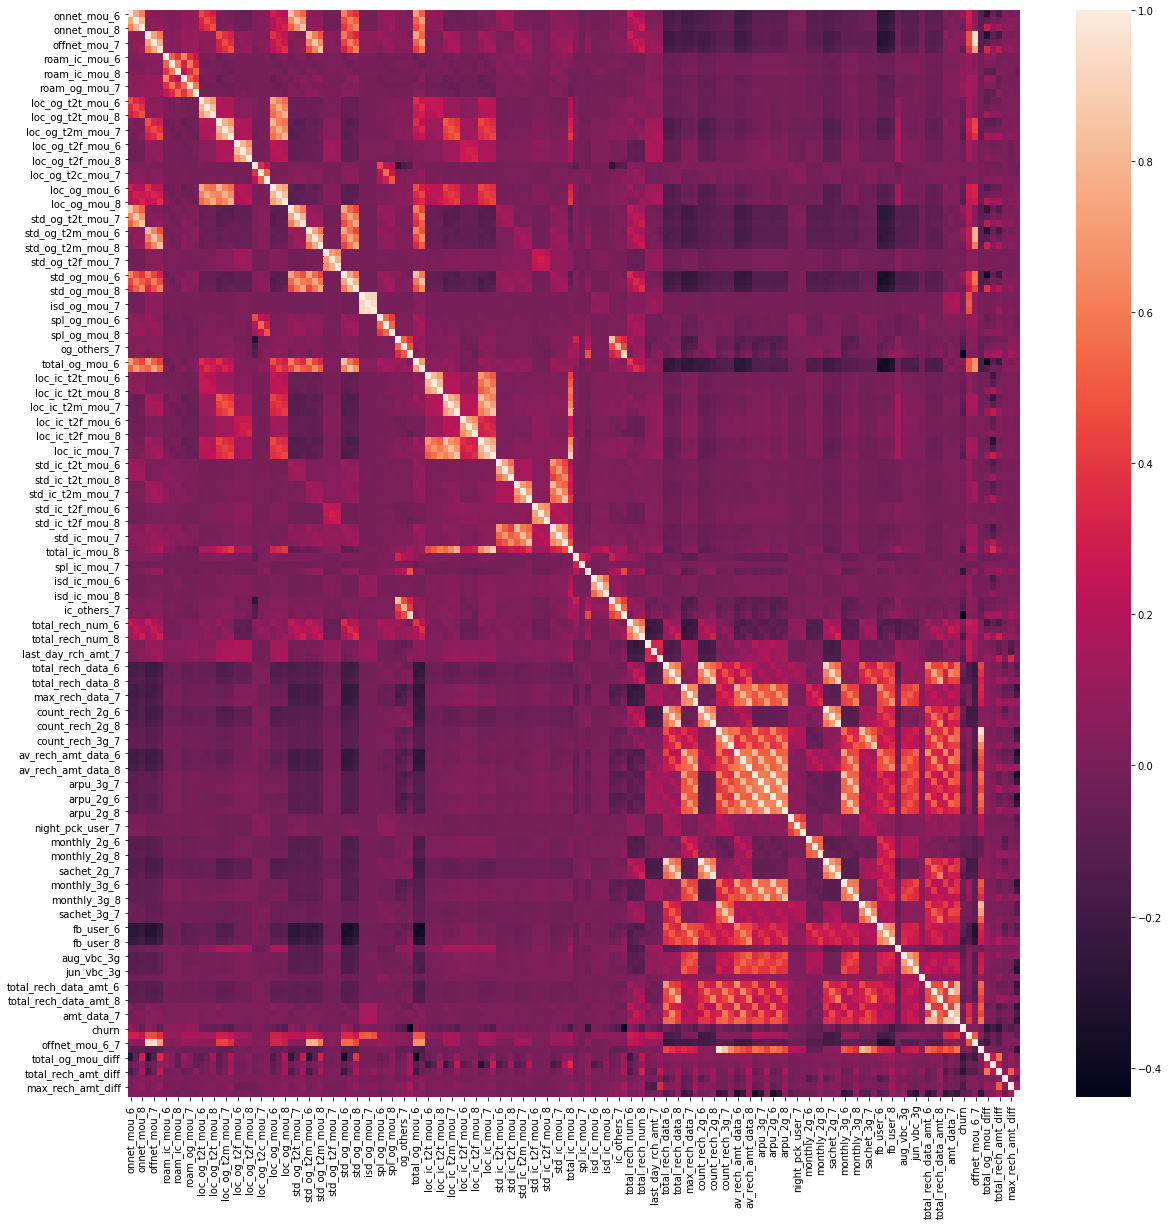

In [45]:
#corrrelationDataFrame =pd.DataFrame(filtered_df_cleaned1.corr())
#corrrelationDataFrame.to_csv('correlated.csv')
plt.figure(figsize=[20,20])
sns.heatmap(filtered_df_cleaned1.corr())

In [0]:
## Building the Logistic regression model by deleting the highly correlated variable

In [47]:


correlatedColumnsList =['onnet_mou_7','std_og_t2t_mou_6','total_og_mou_6','std_og_t2t_mou_8','offnet_mou_7','std_og_t2m_mou_6',
'std_og_t2m_mou_8','loc_og_t2t_mou_7','loc_og_mou_6','loc_og_t2m_mou_7','loc_og_mou_8','loc_og_t2f_mou_7',
'std_og_mou_7','std_og_t2f_mou_8','isd_og_mou_7','isd_og_mou_8','ic_others_6','ic_others_7','ic_others_8','loc_ic_t2t_mou_7',
'loc_ic_mou_6','loc_ic_t2m_mou_7','loc_ic_mou_8','total_ic_mou_8','loc_ic_t2f_mou_7','std_ic_t2t_mou_7',
'std_ic_mou_6','std_ic_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_7','isd_ic_mou_7','total_rech_num_8','sachet_2g_6',
'count_rech_2g_7','sachet_2g_7','total_rech_data_amt_7','total_rech_data_8','av_rech_amt_data_6','arpu_2g_6','av_rech_amt_data_7','av_rech_amt_data_8','sachet_2g_8',
'sachet_3g_6','sachet_3g_7','sachet_3g_8','monthly_3g_6','arpu_2g_7','arpu_2g_8','monthly_3g_8','amt_data_6','offnet_mou_6']

filteredDf_NoCorr = filtered_df_cleaned1.drop(correlatedColumnsList,axis =1)



from sklearn.model_selection import train_test_split

# Putting feature variable to X
y = filteredDf_NoCorr['churn']
X = filteredDf_NoCorr.drop(['churn'],axis=1)

# Putting response variable to y

filtered_df_cleaned_colsDropped =  filteredDf_NoCorr.drop(['churn'],axis=1)
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,test_size=0.25,random_state=100)

In [0]:
colsList = list(X_train.columns)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.min()
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_trbal,y_trbal = sm.fit_sample(X_train,y_train)

-25.55790412804321

In [51]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_trbal,y_trbal)
y_pred = logreg.predict(X_test)
y_train_prd =  logreg.predict(X_train)
print('Training Accuracy of model : ' , metrics.accuracy_score(y_train, y_train_prd))
print('Test Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))

print('Test Recall of model : ' , metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))



LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy of model :  0.8470704618013399
Test Accuracy of model :  0.8454275694631778
Test Recall of model :  0.8461538461538461
Area under Curve  0.8457595998963696


## Building Model With All variable In Data

In [52]:

y = filtered_df_cleaned1['churn']
X = filtered_df_cleaned1.drop(['churn'],axis=1)



y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,test_size=0.25,random_state=100)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.min()
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)

X_trbal,y_trbal = sm.fit_sample(X_train,y_train)

-25.55790412804321

In [55]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_trbal,y_trbal)
y_pred = logreg.predict(X_test)
y_train_prd =  logreg.predict(X_train)
print('Training Accuracy of model : ' , metrics.accuracy_score(y_train, y_train_prd))
print('Test Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))

print('Test Recall of model : ' , metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy of model :  0.8475201223076577
Test Accuracy of model :  0.846776369031562
Test Recall of model :  0.8495726495726496
Area under Curve  0.8480547389025936


### Creating a RFE Model

In [56]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_trbal,y_trbal)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking



[False  True  True False False False False False False False False False
 False False  True  True False False  True False False False False False
 False False False False  True False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False  True False False False False False
  True False False False False False  True  True False False False False
  True False  True False False  True False False  True False False  True
 False False  True False False  True False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False  True False False False
 False False False False False False False False  True False False False
 False  True False False False False False False  True False False  True
 False False False False False]
[  2   1   1  42  84  43 101  85 111 100   8  47  36  75   1   1  81  38
   1  24  25  41  4

In [0]:
X_rfe = pd.DataFrame(data=X_trbal).iloc[:, rfe.support_]
y_rfe = y_trbal
X_test_rfe=pd.DataFrame(data=X_test).iloc[:, rfe.support_]


In [58]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,class_weight='balanced')
logreg.fit(X_rfe, y_rfe)

y_pred = logreg.predict(X_test_rfe)


print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))
print('Sensitivity of model : ' , metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      6829
           1       0.31      0.83      0.45       585

    accuracy                           0.84      7414
   macro avg       0.65      0.84      0.68      7414
weighted avg       0.93      0.84      0.87      7414

[[5737 1092]
 [  98  487]]
Accuracy of model :  0.8394928513622876
Sensitivity of model :  0.8324786324786325
Area under Curve  0.836286175223062


### Finding the Best Paramters for Logistic Regression

In [59]:
params= {'C':[0.000001,0.0001,0.05,0.1,0.5,0.6,0.7,0.8,0.9,1,10],'penalty':['l1','l2']}
logreg = LogisticRegression(class_weight='balanced')
model = GridSearchCV(estimator  = logreg,cv = 5,param_grid=params,scoring='recall')
model.fit(X_train,y_train)
model.best_params_
model.best_score_

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-06, 0.0001, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8,
                               0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

{'C': 0.05, 'penalty': 'l2'}

0.8157608695652174

### Building the Best Paramters for Logistic Regression

In [60]:


logreg = LogisticRegression(class_weight='balanced',penalty='l2',C = 0.05)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_train_prd =  logreg.predict(X_train)
print('Training Accuracy of model : ' , metrics.accuracy_score(y_train, y_train_prd))
print('Test Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))
print('Sensitivity of model : ' , metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))


LogisticRegression(C=0.05, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Training Accuracy of model :  0.8467556994469175
Test Accuracy of model :  0.8456973293768546
Sensitivity of model :  0.8495726495726496
Area under Curve  0.8474690016057713


###  Building SVM Model

In [61]:

from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print('Training Accuracy of model : ' , metrics.accuracy_score(y_train, y_train_prd))
print('Test Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))
print('Sensitivity of model : ' , metrics.recall_score(y_test, y_pred))



KeyboardInterrupt: ignored

### Finding the Best Paramters for Decision Tree


In [65]:

decisionTree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

params= {'max_depth':[100,105,110,115,120.130],'min_samples_split':[200,225,250],'min_samples_leaf':[100,150,200,250,300,350,400]}
model = GridSearchCV(estimator  = decisionTree,cv = 4,param_grid=params,scoring='recall')
model.fit(X_train,y_train)

model.best_params_
model.best_score_

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

AttributeError: ignored

### Building Decision Tree


In [70]:

decisionTree = DecisionTreeClassifier(max_depth = 100, min_samples_split=200,min_samples_leaf=200,class_weight='balanced',random_state=100)
decisionTree.fit(X_train,y_train)
y_pred = decisionTree.predict(X_test)
y_train_prd   = decisionTree.predict(X_train)
print('Training Accuracy of model : ' , metrics.accuracy_score(y_train, y_train_prd))
print('Test Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))
print('Sensitivity of model : ' , metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=200, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Training Accuracy of model :  0.8434282117001664
Test Accuracy of model :  0.8394928513622876
Sensitivity of model :  0.8324786324786325
Area under Curve  0.836286175223062


### Finding the Best Parameters for Random Forest Model


In [71]:
rfc=RandomForestClassifier(random_state=100,class_weight='balanced')

###Finding the Best Paramters for Random Forest
params={'n_estimators':[20,50,70,80],'min_samples_split':[200,500,700]}
model = GridSearchCV(estimator  = rfc,cv = 4,param_grid=params,scoring='recall')
model.fit(X_train,y_train)
print(model.best_params_)
model.best_score_
model.best_params_
model.best_score_

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

{'min_samples_split': 700, 'n_estimators': 70}


0.7864130434782608

{'min_samples_split': 700, 'n_estimators': 70}

0.7864130434782608

### Building Random Forest Classifier

In [74]:

rfc=RandomForestClassifier(class_weight='balanced',n_estimators=70,max_depth = 50, min_samples_split=700, min_samples_leaf=250,random_state=100)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
y_train_prd   = rfc.predict(X_train)
print('Training Accuracy of model : ' , metrics.accuracy_score(y_train, y_train_prd))
print('Test Accuracy of model : ' , metrics.accuracy_score(y_test, y_pred))
print("Sensitivity of model ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=250, min_samples_split=700,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

Training Accuracy of model :  0.8879895678762534
Test Accuracy of model :  0.8898030752630159
Sensitivity of model  0.811965811965812
Area under Curve  0.8542183723762286


In [75]:
##Extracting Important Variables
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
total_ic_mou_8,0.103693
roam_og_mou_8,0.081027
total_rech_amt_diff,0.078338
last_day_rch_amt_8,0.067163
roam_ic_mou_8,0.048361
loc_og_mou_8,0.045659
loc_ic_t2m_mou_8,0.045117
total_ic_mou_diff,0.038496
loc_ic_mou_8,0.038029
total_og_mou_diff,0.037588


In [0]:
# Performing PCA

In [0]:
from sklearn.decomposition import PCA   ## import PCA
pca = PCA(random_state=100)  ### Define PCA
X_trbal_pca = pca.fit_transform(X_trbal)
X_test_pca = pca.transform(X_test)

Text(0.5, 0, 'no of principal components')

Text(0, 0.5, 'explained variance - cumulative')

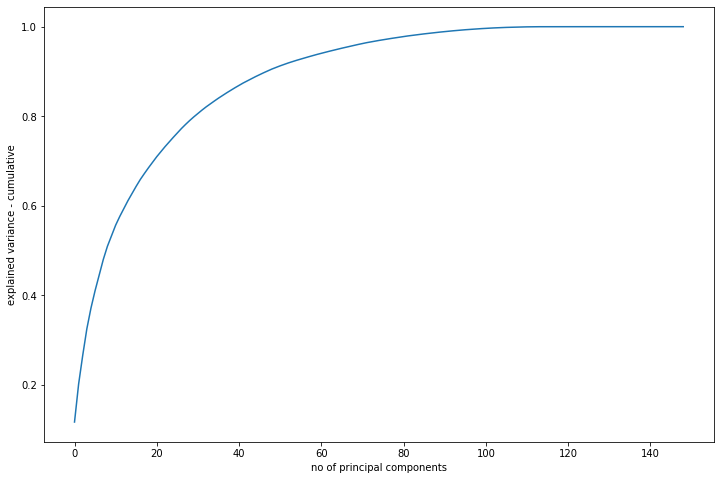

array([11.69, 20.17, 26.6 , 32.52, 37.13, 41.02, 44.51, 47.99, 50.93,
       53.32, 55.65, 57.6 , 59.38, 61.14, 62.75, 64.35, 65.86, 67.2 ,
       68.49, 69.74, 70.95, 72.08, 73.17, 74.22, 75.25, 76.25, 77.24,
       78.15, 79.02, 79.83, 80.6 , 81.35, 82.07, 82.74, 83.38, 84.02,
       84.62, 85.21, 85.78, 86.34, 86.88, 87.4 , 87.88, 88.36, 88.82,
       89.27, 89.7 , 90.12, 90.52, 90.89, 91.24, 91.57, 91.89, 92.19,
       92.48, 92.76, 93.03, 93.29, 93.55, 93.8 , 94.04, 94.27, 94.5 ,
       94.73, 94.96, 95.18, 95.39, 95.6 , 95.81, 96.01, 96.21, 96.4 ,
       96.57, 96.74, 96.9 , 97.05, 97.2 , 97.35, 97.49, 97.63, 97.77,
       97.9 , 98.02, 98.14, 98.26, 98.37, 98.48, 98.59, 98.69, 98.79,
       98.89, 98.98, 99.07, 99.15, 99.23, 99.31, 99.38, 99.45, 99.51,
       99.57, 99.63, 99.68, 99.73, 99.77, 99.81, 99.84, 99.87, 99.89,
       99.91, 99.93, 99.95, 99.97, 99.98, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99,

In [78]:
col = list(X.columns)
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

### 60 columns shows 90% variance


In [0]:
pca_50 = PCA(n_components=60)

df_trbal_pca_50 = pca_50.fit_transform(X_trbal)
df_test_pca_50 = pca_50.transform(X_test)


### Building Logistic Regression Model on PCA Components

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_trbal_pca_50,  y_trbal)

# Predicted probabilities
y_pred_50 = lr_pca1.predict(df_test_pca_50)

# Converting y_pred to a dataframe which is an array
y_pred_by_pca = pd.DataFrame(y_pred_50)

print("\n The accuracy of model is  ",metrics.accuracy_score(y_test,y_pred_by_pca))
print("\n  Sensitivity of model is  ",metrics.recall_score(y_test,y_pred_by_pca))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


 The accuracy of model is   0.8462368492042083

  Sensitivity of model is   0.841025641025641
Area under Curve  0.8542183723762286


### Finding the Best Paramters for Logistic Regression


In [81]:

params= {'C':[0.000001,0.0001,0.05,0.1,0.5,0.6,0.7,0.8,0.9,1,10,50,70,100],'penalty':['l1','l2']}
logreg = LogisticRegression(class_weight='balanced')
model = GridSearchCV(estimator  = logreg,cv = 10,param_grid=params,scoring='recall')
model.fit(df_trbal_pca_50,y_trbal)
model.best_score_
model.best_params_


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-06, 0.0001, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8,
                               0.9, 1, 10, 50, 70, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

0.8446491936647144

{'C': 0.5, 'penalty': 'l2'}

### Building the model with best parameters


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=0.5,penalty='l2')
lr_pca1.fit(df_trbal_pca_50,  y_trbal)

# Predicted probabilities
y_pred_50 = lr_pca1.predict(df_test_pca_50)

# Converting y_pred to a dataframe which is an array
y_pred_by_pca = pd.DataFrame(y_pred_50)

print("\n The accuracy of model is  ",metrics.accuracy_score(y_test,y_pred_by_pca))
print("\n  Sensitivity of model is  ",metrics.recall_score(y_test,y_pred_by_pca))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


 The accuracy of model is   0.8461019692473698

  Sensitivity of model is   0.841025641025641
Area under Curve  0.8542183723762286


### Building SVM Model on PCA


In [0]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(df_trbal_pca_50,  y_trbal)

y_pred_50_svm = svm_linear.predict(df_test_pca_50)

print(metrics.accuracy_score(y_test, y_pred_50_svm))
print(metrics.recall_score(y_test,y_pred_by_pca))
print(metrics.classification_report(y_test, y_pred_50_svm))
print(metrics.confusion_matrix(y_test, y_pred_50_svm))

### Creating RFE Model on Principal Component


In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(df_trbal_pca_50,y_trbal)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False  True False  True False  True False  True False False  True False
  True False False  True False False False False  True False False False
 False False False  True  True  True  True False False False False False
 False False False False False False  True False False False False False
 False False False False False False  True  True False False False False]
[21  1 36  1 45  1 43  1 20 31  1  5  1 37 11  1 24  2 30 35  1 46 42 22
 44 15 26  1  1  1  1 29 32 17 38  8 23 39 34 18 19 14  1 25  7 41 33  3
 10  6 12 13 27 28  1  1  4  9 40 16]


In [0]:

X_rfe = pd.DataFrame(data=df_trbal_pca_50).iloc[:, rfe.support_]
y_rfe = y_trbal
X_test_rfe=pd.DataFrame(data=df_test_pca_50).iloc[:, rfe.support_]

In [85]:

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,class_weight='balanced')
logreg.fit(X_rfe, y_rfe)

y_pred = logreg.predict(X_test_rfe)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

print("\n The accuracy of model is  ",metrics.accuracy_score(y_test,y_pred_by_pca))
print("\n  Sensitivity of model is  ",metrics.recall_score(y_test,y_pred_by_pca))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      6829
           1       0.33      0.84      0.47       585

    accuracy                           0.85      7414
   macro avg       0.66      0.85      0.69      7414
weighted avg       0.93      0.85      0.88      7414

[[5840  989]
 [  95  490]]

 The accuracy of model is   0.8461019692473698

  Sensitivity of model is   0.841025641025641
Area under Curve  0.8463916454837527


### Finding the Best Parameters for Random Forest Model


In [0]:
rfc=RandomForestClassifier(random_state=100,class_weight='balanced')

###Finding the Best Paramters for Random Forest
params={'n_estimators':[20,50,70,80],'min_samples_split':[200,500,700]}
model = GridSearchCV(estimator  = rfc,cv = 4,param_grid=params,scoring='recall')
model.fit(X_train,y_train)
print(model.best_params_)
model.best_score_
model.best_params_
model.best_score_

### Creating Random Forest Classifier Model on Principal Component


In [0]:
rfc=RandomForestClassifier(class_weight='balanced',n_estimators=20,max_depth = 50, min_samples_split=700, min_samples_leaf=250,random_state=100)

rfc.fit(df_trbal_pca_50,y_trbal)
y_pred = rfc.predict(df_test_pca_50)
y_train_prd   = rfc.predict(df_trbal_pca_50)



print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print("\n The accuracy of model is  ",metrics.accuracy_score(y_test,y_pred))
print("\n  Sensitivity of model is  ",metrics.recall_score(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

### Finding the Best Paramters for Decision Tree



In [0]:
decisionTree = DecisionTreeClassifier(class_weight='balanced',random_state=100)

params= {'max_depth':[100,105,110,115,120.130],'min_samples_split':[200,225,250],'min_samples_leaf':[100,150,200,250,300,350,400]}
model = GridSearchCV(estimator  = decisionTree,cv = 4,param_grid=params,scoring='recall')
model.fit(X_train,y_train)
model.best_params_
model.best_score_

### Building Decision Tree Model  on Principal Component


In [0]:

decisionTree = DecisionTreeClassifier(max_depth = 100, min_samples_split=200,min_samples_leaf=200,class_weight='balanced',random_state = 100)
decisionTree.fit(df_trbal_pca_50,y_trbal)
y_pred = decisionTree.predict(df_test_pca_50)
y_train_prd   = rfc.predict(df_trbal_pca_50)


print("\n",metrics.accuracy_score(y_test, y_pred))
print("\n",metrics.recall_score(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))

### Building SVM Model with Hyperparameters  on Principal Component


In [0]:
from sklearn import svm
svm_linear = svm.SVC(C =0.001)
svm_linear.fit(df_trbal_pca_50,  y_trbal)

y_pred_50_svm = svm_linear.predict(df_test_pca_50)

print("\n The accuracy of model is  ",metrics.accuracy_score(y_test,y_pred_by_pca))
print("\n  Sensitivity of model is  ",metrics.recall_score(y_test,y_pred_by_pca))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area under Curve ",metrics.auc(fpr, tpr))
print(metrics.classification_report(y_test, y_pred_50_svm))
print(metrics.confusion_matrix(y_test, y_pred_50_svm))

# <font color="purple"> Strategies to Manage Customer Churn</font>


<b><font color="blue" size="4">1. The Customer who uses scheme  specific to night hours only or customer who use the schemes specific to Facebok
has higher average revenue per user, This can be due to high pricing. We can also see such customer have high probability of churning. Company can review the pricing of night packs and internet packs</b><br><br>
<b><font color="blue" size="4">2. The customer does not spend more than 2 years of network due to some reason,Company can roll out some loyalty rewards to customer who complete the specific period of time with network  </b><br><br>
<b><font color="blue" size="4">3. The customer who leaves the network does not depend whether customer has 2G or 3G network, The average revenue is same from both 2g and 3G Network. <br>The customer's average revenue to company and number of outgoing calls decreases in action phase as compared to good phase when the customer is about to churn</b>
        

SyntaxError: ignored